Garcia-Ojalvo J, Elowitz MB, Strogatz SH. Modeling a synthetic multicellular clock: repressilators coupled by quorum sensing. Proc Natl Acad Sci U S A. 2004;101(30):10955-10960. doi:10.1073/pnas.0307095101

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections
import numpy.fft as fft
import collections
from scipy.signal import find_peaks

## Figure n°2 - Frequency histogram and time evolution of bi(t) for 10 cells and increasing cell density

In [73]:
### Constant values
nCell = 10000 # Number of cells to use
n = 2 # Hill coefficient
alpha = 111 # Transcription rate in the absence of repressor
kappa = 20 # Maximal contribution to lacI transcription in the presence of saturating amounts of AI
k_s0 = 1 
k_s1 = 0.01
t = 600 # Time during which the modelisation will be done
eta = 2 # Diffusion rate of AI across the cell membrane
beta = [] # List of beta values of cells
for i in range(nCell):
    beta.append(random.gauss(1, 0.05))
tau = 0.33 # Time interval 

### MODELISATION WITH RUNGE-KUTTA'S METHOD

In [74]:
Q = 0.4 # Control parameter which depends on cellular density

10000


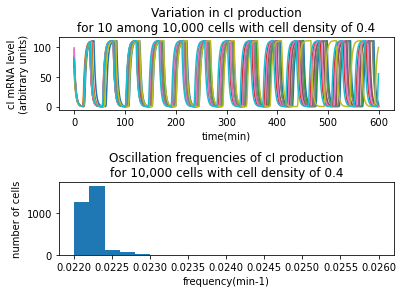

In [76]:
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

for cell in range(nCell):
            b[cell,0] = random.randint(50, 100)
            a[cell,0] = random.randint(50, 100)
            c[cell,0] = random.randint(50, 100)

            A[cell,0] = random.randint(50, 100)
            B[cell,0] = random.randint(50, 100)
            C[cell,0] = random.randint(50, 100)

            S[cell,0] = random.randint(50, 100)
            Se[cell,0] = random.randint(50, 100)

frequence_list = []

time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

tot_freq=[]
for i in range(nCell):
    #plt.plot(time,b[i])

    peaks, _ = find_peaks(b[i])
    peaks_l, _ = find_peaks(-b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 and n < len(peaks_l)-1:
            period = peaks[n+1]-peaks[n]
            period_l = peaks_l[n+1]-peaks_l[n]
            freqs.append(period)
            freqs.append(period_l)
        else :
            break
        n+=1
    tot_freq.append(1/np.mean(freqs))


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace= 1)


cellplot = [random.randint(0,nCell-1) for p in range(0,10)]
for i in cellplot :
    #plt.plot(time, b[i])
    axs[0].plot(time, b[i])
    axs[0].set_title('Variation in cI production' + '\n'+'for 10 among 10,000 cells with cell density of ' + str(Q))
    axs[0].set_ylabel('cI mRNA level' +'\n'+'(arbitrary units)')
    axs[0].set_xlabel('time(min)')

print(len(tot_freq))

#plt.hist(tot_freq, bins = 50, range =(0.02,0.03))
axs[1].hist(tot_freq, bins = 20, range =(0.022,0.026))
axs[1].set_title('Oscillation frequencies of cI production' + '\n' + 'for 10,000 cells with cell density of ' + str(Q))
axs[1].set_ylabel('number of cells')
axs[1].set_xlabel('frequency(min-1)')
plt.savefig("./rungekutta_alpha_"+str(alpha)+"_b_"+str(b[0,0])+"_q_"+str(Q)+".jpg")

In [5]:
Q = 0.63

10000


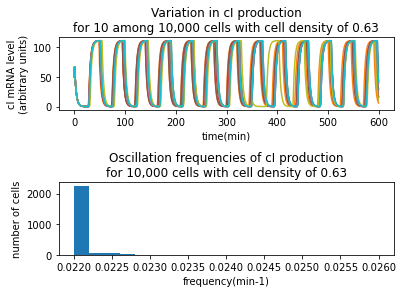

In [6]:
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

for cell in range(nCell):
            b[cell,0] = random.randint(50, 100)
            a[cell,0] = random.randint(50, 100)
            c[cell,0] = random.randint(50, 100)

            A[cell,0] = random.randint(50, 100)
            B[cell,0] = random.randint(50, 100)
            C[cell,0] = random.randint(50, 100)

            S[cell,0] = random.randint(50, 100)
            Se[cell,0] = random.randint(50, 100)

frequence_list = []

time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

tot_freq=[]
for i in range(nCell):
    #plt.plot(time,b[i])

    peaks, _ = find_peaks(b[i])
    peaks_l, _ = find_peaks(-b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 and n < len(peaks_l)-1:
            period = peaks[n+1]-peaks[n]
            period_l = peaks_l[n+1]-peaks_l[n]
            freqs.append(period)
            freqs.append(period_l)
        else :
            break
        n+=1
    tot_freq.append(1/np.mean(freqs))


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace= 1)


cellplot = [random.randint(0,nCell-1) for p in range(0,10)]
for i in cellplot :
    #plt.plot(time, b[i])
    axs[0].plot(time, b[i])
    axs[0].set_title('Variation in cI production' + '\n'+'for 10 among 10,000 cells with cell density of ' + str(Q))
    axs[0].set_ylabel('cI mRNA level' +'\n'+'(arbitrary units)')
    axs[0].set_xlabel('time(min)')

print(len(tot_freq))

#plt.hist(tot_freq, bins = 50, range =(0.02,0.03))
axs[1].hist(tot_freq, bins = 20, range =(0.022,0.026))
axs[1].set_title('Oscillation frequencies of cI production' + '\n' + 'for 10,000 cells with cell density of ' + str(Q))
axs[1].set_ylabel('number of cells')
axs[1].set_xlabel('frequency(min-1)')
plt.savefig("./rungekutta_alpha_"+str(alpha)+"_b_"+str(b[0,0])+"_q_"+str(Q)+".jpg")

In [7]:
Q = 0.8

10000


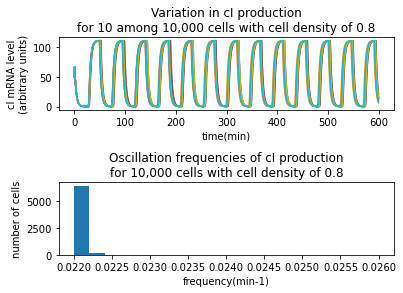

In [8]:
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

for cell in range(nCell):
            b[cell,0] = random.randint(50, 100)
            a[cell,0] = random.randint(50, 100)
            c[cell,0] = random.randint(50, 100)

            A[cell,0] = random.randint(50, 100)
            B[cell,0] = random.randint(50, 100)
            C[cell,0] = random.randint(50, 100)

            S[cell,0] = random.randint(50, 100)
            Se[cell,0] = random.randint(50, 100)

frequence_list = []

time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

tot_freq=[]
for i in range(nCell):
    peaks, _ = find_peaks(b[i])
    peaks_l, _ = find_peaks(-b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 and n < len(peaks_l)-1:
            period = peaks[n+1]-peaks[n]
            period_l = peaks_l[n+1]-peaks_l[n]
            freqs.append(period)
            freqs.append(period_l)
        else :
            break
        n+=1
    tot_freq.append(1/np.mean(freqs))


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace= 1)


cellplot = [random.randint(0,nCell-1) for p in range(0,10)]
for i in cellplot :
    axs[0].plot(time, b[i])
    axs[0].set_title('Variation in cI production' + '\n'+'for 10 among 10,000 cells with cell density of ' + str(Q))
    axs[0].set_ylabel('cI mRNA level' +'\n'+'(arbitrary units)')
    axs[0].set_xlabel('time(min)')

print(len(tot_freq))

axs[1].hist(tot_freq, bins = 20, range =(0.022,0.026))
axs[1].set_title('Oscillation frequencies of cI production' + '\n' + 'for 10,000 cells with cell density of ' + str(Q))
axs[1].set_ylabel('number of cells')
axs[1].set_xlabel('frequency(min-1)')
plt.savefig("./rungekutta_alpha_"+str(alpha)+"_b_"+str(b[0,0])+"_q_"+str(Q)+".jpg")

## Figure n°3 - Synchronization transition for increasing Q (a) and Δβ (b). Parameters are the same as those described for Fig. 2. 

In [6]:
def M(t, b, nCell):
    '''
    Calcul of M value which represent the average signal of cells over time.
    '''
    return 1/nCell * sum(b[0:nCell,t])

In [7]:
def R(t1, t2, b, nCell):
    '''
    Calcul of R value between 2 times. 
    R is a parameter that represents the synchronization of the model.
    '''
    M_values = []
    b_values = []
    
    for t in range(t1, t2):
        M_values.append(M(t, b, nCell))
    
    num = np.mean(np.power(M_values,2)) - np.power(np.mean(M_values),2)

    for i in range(0, nCell):
        bi2_values = []
        b2i_values = []
        b2i_values.append(b[i,t1:t2]**2)
        bi2_values.append(b[i,t1:t2])
        
        b_values.append(np.mean(b2i_values) - np.mean(bi2_values)**2)     
    
    den = np.mean(b_values)
    if den != 0:
        return num/abs(den)
    else:
        return 0

### Figure 3A. 

In [50]:
### Constant values
nCell = 10 # Number of cells to use
n = 2 # Hill coefficient
alpha = 112 # Transcription rate in the absence of repressor
kappa = 20 # Maximal contribution to lacI transcription in the presence of saturating amounts of AI
k_s0 = 1
k_s1 = 0.01
t = 2000 # Time during which the modelisation will be done
eta = 2.0 # Diffusion rate of AI across the cell membrane
tau = 0.33 # Time interval

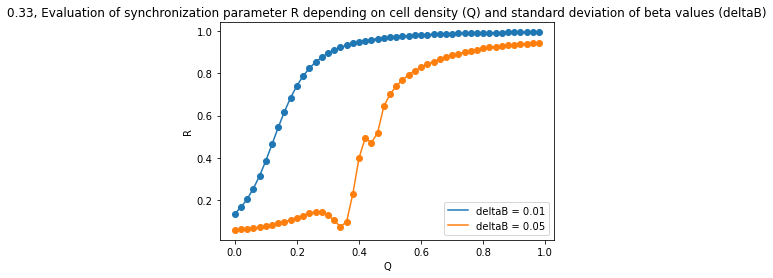

In [53]:
for deltaB in [0.01, 0.05]:
    Q_values = []
    R_values = []
    beta = []
    for i in range(nCell):
        beta.append(random.gauss(1, deltaB))
    for Q in np.arange(0, 1, 0.02):
        ### Matrix initialization
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        for cell in range(nCell):
            b[cell,0] = random.randint(50, 100)
            a[cell,0] = random.randint(50, 100)
            c[cell,0] = random.randint(50, 100)

            A[cell,0] = random.randint(50, 100)
            B[cell,0] = random.randint(50, 100)
            C[cell,0] = random.randint(50, 100)

            S[cell,0] = random.randint(50, 100)
            Se[cell,0] = random.randint(50, 100)

        ### Calcul of values
        for j in range(0, t-1):
            for i in range(0, nCell):

                abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

                Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
                Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
                Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

                Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

                a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
                b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
                c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

                A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
                B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
                C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

                S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

                Se[i,j+1] = Q*np.mean(S[:,j])

        Q_values.append(Q)
        R_values.append(R(1500, 2000, b, nCell))
    plt.scatter(Q_values, R_values)
    plt.plot(Q_values, R_values, label= str("deltaB = " + str(deltaB)))
    plt.title("Evaluation of synchronization parameter R depending on cell density (Q) and standard deviation of beta values (deltaB)")
    plt.xlabel("Q")
    plt.ylabel("R")
    plt.legend()
#plt.show()


### Figure 3B. 

In [69]:
### Constant values
nCell = 10 # Number of cells to use
n = 2 # Hill coefficient
alpha = 216 # Transcription rate in the absence of repressor
kappa = 20 # Maximal contribution to lacI transcription in the presence of saturating amounts of AI
k_s0 = 1 
k_s1 = 0.01
t = 1500 # Time during which the modelisation will be done

tau = 0.08 # Time interval 

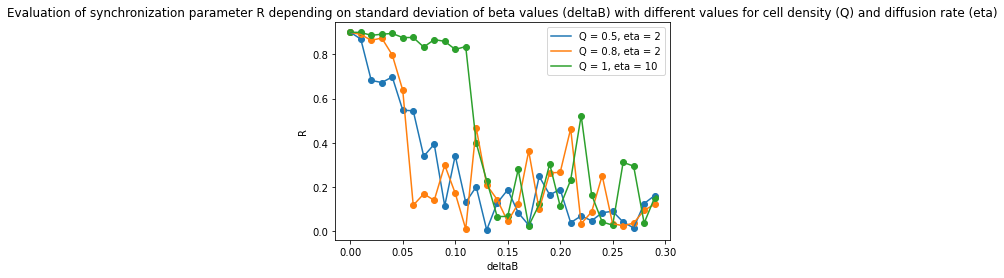

In [70]:
for Q, eta in (0.5, 2), (0.8, 2), (1, 10):
    deltaB_values = []
    R_values = []

    for deltaB in np.arange(0, 0.3, 0.01):
        beta = []
        for i in range(nCell):
            beta.append(random.gauss(1, deltaB))

        ### Matrix initialization
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        for cell in range(nCell):
            b[cell,0] = random.randint(50, 100)
            a[cell,0] = random.randint(50, 100)
            c[cell,0] = random.randint(50, 100)

            A[cell,0] = random.randint(50, 100)
            B[cell,0] = random.randint(50, 100)
            C[cell,0] = random.randint(50, 100)

            S[cell,0] = random.randint(50, 100)
            Se[cell,0] = random.randint(50, 100)

        ### Calcul of values
        for j in range(1, t-1):
            for i in range(1, nCell):
                abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/(1+S[i,j])))

                Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
                Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
                Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

                Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

                a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
                b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
                c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/(1+Sbis)))

                A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
                B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
                C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

                S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

                Se[i,j+1] = Q*np.mean(S[:,j])

        deltaB_values.append(deltaB)
        R_values.append(R(1400, 1500, b, nCell))
    plt.scatter(deltaB_values, R_values)
    plt.plot(deltaB_values, R_values, label = str("Q = " + str(Q) + ", eta = " + str(eta)))
    plt.title("Evaluation of synchronization parameter R depending on standard deviation of beta values (deltaB) with different values for cell density (Q) and diffusion rate (eta)")
    plt.xlabel("deltaB")
    plt.ylabel("R")
    plt.legend()


### Figure 4A

In [39]:
nCell = 100
##constantes
n = 2
alpha = 216
kappa = 20
k_s0 = 1
k_s1 = 0.01
t = 2000
eta = 2

beta = []
for i in range(nCell):
    beta.append(random.gauss(1,0))

tau = 0.35 ##a voir

D = 0.6/tau

'''
Réalisation de la simulation pour Q = 1, les cellules sont en synchro parfaite.
'''
Q = 1

##initialisation des matrices
a = np.zeros((nCell, t))
bQ1 = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))


for cell in range(nCell):
    bQ1[cell,0] = random.randint(50, 100)
    a[cell,0] = random.randint(50, 100)
    c[cell,0] = random.randint(50, 100)

    A[cell,0] = random.randint(50, 100)
    B[cell,0] = random.randint(50, 100)
    C[cell,0] = random.randint(50, 100)

    S[cell,0] = random.randint(50, 100)
    Se[cell,0] = random.randint(50, 100)


time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        xiA = random.gauss(0, D)
        betabisA = beta[i] + (xiA*tau)
        
        xiB = random.gauss(0, D)
        betabisB = beta[i] + (xiB*tau)
        
        xiC = random.gauss(0, D)
        betabisC = beta[i] + (xiC*tau)

        abis = a[i, j] + tau / 2 * (-a[i, j] + (alpha / (1 + C[i, j] ** n)))
        bbis = bQ1[i, j] + tau / 2 * (-bQ1[i, j] + (alpha / (1 + A[i, j] ** n)))
        cbis = c[i, j] + tau / 2 * (-c[i, j] + (alpha / (1 + B[i, j] ** n)) + (kappa * S[i, j] / 1 + S[i, j]))

        Abis = A[i, j] + tau / 2 * (betabisA * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau / 2 * (betabisB * (bQ1[i, j] - B[i, j]))
        Cbis = C[i, j] + tau / 2 * (betabisC * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau / 2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i, j + 1] = a[i, j] + tau * (-abis + (alpha / (1 + Cbis ** n)))
        bQ1[i, j + 1] = bQ1[i, j] + tau * (-bbis + (alpha / (1 + Abis ** n)))
        c[i, j + 1] = c[i, j] + tau * (-cbis + (alpha / (1 + Bbis ** n)) + (kappa * Sbis / 1 + Sbis))

        A[i, j + 1] = A[i, j] + tau * (betabisA * (abis - Abis))
        B[i, j + 1] = B[i, j] + tau * (betabisB * (bbis - Bbis))
        C[i, j + 1] = C[i, j] + tau * (betabisC * (cbis - Cbis))

        S[i, j + 1] = S[i, j] + tau * ((-k_s0 * Sbis) + (k_s1 * Abis) - (eta * (Sbis - Se[i, j])))
        
        Se[i, j+1] = Q * np.mean(S[:, j])

In [40]:
'''
Réalisation de la simulation pour Q = 0, les cellules sont totalement en désynchro.
'''
Q = 0

beta = []
for i in range(nCell):
    beta.append(random.gauss(1,0))

##initialisation des matrices
a = np.zeros((nCell, t))
bQ2 = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

for cell in range(nCell):
    bQ2[cell,0] = random.randint(50, 100)
    a[cell,0] = random.randint(50, 100)
    c[cell,0] = random.randint(50, 100)

    A[cell,0] = random.randint(50, 100)
    B[cell,0] = random.randint(50, 100)
    C[cell,0] = random.randint(50, 100)

    S[cell,0] = random.randint(50, 100)
    Se[cell,0] = random.randint(50, 100)


time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        xiA = random.gauss(0, D)
        betabisA = beta[i] + (xiA*tau)
        
        xiB = random.gauss(0, D)
        betabisB = beta[i] + (xiB*tau)
        
        xiC = random.gauss(0, D)
        betabisC = beta[i] + (xiC*tau)

        abis = a[i, j] + tau / 2 * (-a[i, j] + (alpha / (1 + C[i, j] ** n)))
        bbis = bQ2[i, j] + tau / 2 * (-bQ2[i, j] + (alpha / (1 + A[i, j] ** n)))
        cbis = c[i, j] + tau / 2 * (-c[i, j] + (alpha / (1 + B[i, j] ** n)) + (kappa * S[i, j] / 1 + S[i, j]))

        Abis = A[i, j] + tau / 2 * (betabisA * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau / 2 * (betabisB * (bQ2[i, j] - B[i, j]))
        Cbis = C[i, j] + tau / 2 * (betabisC * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau / 2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i, j + 1] = a[i, j] + tau * (-abis + (alpha / (1 + Cbis ** n)))
        bQ2[i, j + 1] = bQ2[i, j] + tau * (-bbis + (alpha / (1 + Abis ** n)))
        c[i, j + 1] = c[i, j] + tau * (-cbis + (alpha / (1 + Bbis ** n)) + (kappa * Sbis / 1 + Sbis))

        A[i, j + 1] = A[i, j] + tau * (betabisA * (abis - Abis))
        B[i, j + 1] = B[i, j] + tau * (betabisB * (bbis - Bbis))
        C[i, j + 1] = C[i, j] + tau * (betabisC * (cbis - Cbis))

        S[i, j + 1] = S[i, j] + tau * ((-k_s0 * Sbis) + (k_s1 * Abis) - (eta * (Sbis - Se[i, j])))
        
        Se[i, j+1] = Q * np.mean(S[:, j])

(0.1, 1000)

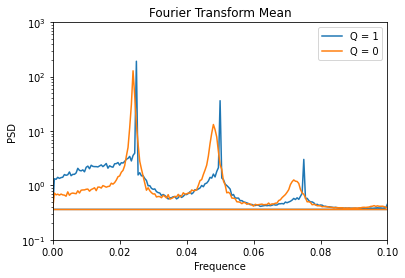

In [41]:
fourierQ1list = []
fourierQ2list = []

for cell in range(nCell):
    #Centralisation et normalisation de b
    b1Q1norm = (bQ1[cell, 0:2000] - (np.mean(bQ1[cell, 0:2000])))/(np.var(bQ1[cell, 0:2000]))

    b1Q2norm = (bQ2[cell, 0:2000] - (np.mean(bQ2[cell, 0:2000])))/(np.var(bQ2[cell, 0:2000]))

    autoCorrelQ1 = np.correlate(b1Q1norm, b1Q1norm, mode="full")
    autoCorrelQ1 = autoCorrelQ1[autoCorrelQ1.size//2:]
    
    autoCorrelQ2 = np.correlate(b1Q2norm, b1Q2norm, mode="full")
    autoCorrelQ2 = autoCorrelQ2[autoCorrelQ2.size//2:]

    #Réalisation des transformées de fourier et récupération dans une liste
    fourierQ1list.append(np.fft.fft(autoCorrelQ1))
    fourierQ2list.append(np.fft.fft(autoCorrelQ2))

#calcul des fréquences fft
freqfour=np.fft.fftfreq(len(autoCorrelQ2))


#calcul de la moyenne des fft:
fourierQ1 = np.array([np.mean(k) for k in zip(*fourierQ1list)])
fourierQ2 = np.array([np.mean(k) for k in zip(*fourierQ2list)])


#Plot de la transfo de fourier
plt.plot(freqfour, np.real(fourierQ1), label = "Q = 1")
plt.plot(freqfour, np.real(fourierQ2), label = "Q = 0")
plt.xlabel('Frequence')
plt.ylabel('PSD')
plt.yscale('log')
plt.title("Fourier Transform Mean")
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.1, 1000)


### Figure 4B

Text(0, 0.5, 'R')

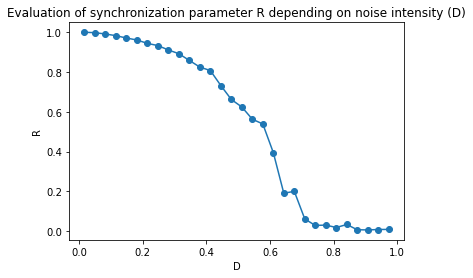

In [78]:
nCell = 100
##constantes
n = 2
alpha = 111
kappa = 20
k_s0 = 1
k_s1 = 0.01
t = 3000
eta = 2

beta = []
for i in range(nCell):
    beta.append(random.gauss(1,0))
tau = 0.33 ##a voir

'''
Réalisation de la simulation pour Q = 1, les cellules sont en synchro parfaite.
'''
Q = 0.4
Dval = []
Rval = []
for D in np.arange(0.05, 1/tau, 0.1):
    Dval.append(D)

    ##initialisation des matrices
    a = np.zeros((nCell, t))
    bQ1 = np.zeros((nCell, t))
    c = np.zeros((nCell, t))

    A = np.zeros((nCell, t))
    B = np.zeros((nCell, t))
    C = np.zeros((nCell, t))

    S = np.zeros((nCell, t))
    Se = np.zeros((nCell, t))

    a[:,0] = 0
    bQ1[:,0] = random.randint(50,100)
    c[:,0] = 0

    A[:,0] = 0
    B[:,0] = 0
    C[:,0] = 0

    S[:,0] = 0
    Se[:,0] = 0


    time = np.arange(0,t)

    for j in range(0, t-1):
        for i in range(0, nCell):
            xi = random.gauss(0, D)
            betabis = beta[i] + (xi*tau)

            Se[i, j] = Q * np.mean(S[:, j])

            abis = a[i, j] + tau / 2 * (-a[i, j] + (alpha / (1 + C[i, j] ** n)))
            bbis = bQ1[i, j] + tau / 2 * (-bQ1[i, j] + (alpha / (1 + A[i, j] ** n)))
            cbis = c[i, j] + tau / 2 * (-c[i, j] + (alpha / (1 + B[i, j] ** n)) + (kappa * S[i, j] / 1 + S[i, j]))

            Abis = A[i, j] + tau / 2 * (betabis * (a[i, j] - A[i, j]))
            Bbis = B[i, j] + tau / 2 * (betabis * (bQ1[i, j] - B[i, j]))
            Cbis = C[i, j] + tau / 2 * (betabis * (c[i, j] - C[i, j]))

            Sbis = S[i, j] + tau / 2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

            a[i, j + 1] = a[i, j] + tau * (-abis + (alpha / (1 + Cbis ** n)))
            bQ1[i, j + 1] = bQ1[i, j] + tau * (-bbis + (alpha / (1 + Abis ** n)))
            c[i, j + 1] = c[i, j] + tau * (-cbis + (alpha / (1 + Bbis ** n)) + (kappa * Sbis / 1 + Sbis))

            A[i, j + 1] = A[i, j] + tau * (betabis * (abis - Abis))
            B[i, j + 1] = B[i, j] + tau * (betabis * (bbis - Bbis))
            C[i, j + 1] = C[i, j] + tau * (betabis * (cbis - Cbis))

            S[i, j + 1] = S[i, j] + tau * ((-k_s0 * Sbis) + (k_s1 * Abis) - (eta * (Sbis - Se[i, j])))
            
    Rval.append(R(1400, 1500, bQ1, nCell))

for i in range(len(Dval)):
    Dval[i] = Dval[i] * tau
plt.scatter(Dval, Rval)
plt.plot(Dval, Rval)
plt.title("Evaluation of synchronization parameter R depending on noise intensity (D)")
plt.xlabel("D")
plt.ylabel("R")